## **Predicciones explicación de nuevos Samples**

A continuación realizaremos las nuevas predicciones junto con un gradiente integrado para cada predicción que se realice para poder entender el porque se realiza dicha predicción.

Instalaremos `tf_explain` para crear cada gradiente despues de realizar la predicción

In [5]:
!pip install tf_explain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.9 MB/s eta 0:00:00


Cargaremos el modelo ya entrenado anteriormente, que posee un `Accuracy` de 0.9986, `Precision` de 1.0 ,`Recall` de 1.0 y `F1-Score` de 1.0

In [116]:
# Load the saved model
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
from tf_explain.core.integrated_gradients import IntegratedGradients


loaded_model = load_model("redCNN.h5")

Aque realizaremos las predicciones y mostraremos cada una de ellas con su respectivo `Gradiente Integrado`

### Predicción 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


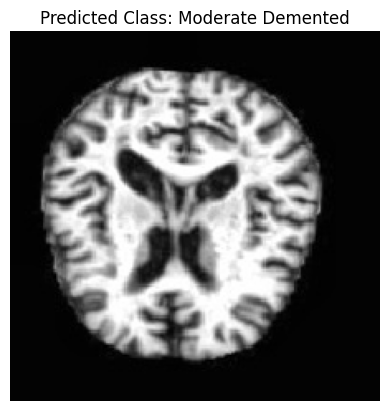

In [188]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

#Definimos los nombres de las clases
class_names = ['Mild Demented', 'Moderate Demented', 'Non-Demented', 'Very Mild Demented']  # Adjust to match your class order


image_path = 'mode.jpg'   # Replace with your image path

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 55.0  # Normalize as done during training

# Predict the class
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]

# Get the class name using the index
predicted_class_name = class_names[predicted_class]

target_label = predicted_class

# Display the image and predicted class name
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Class: {predicted_class_name}")
plt.show()



array([[232, 233, 238, ..., 236, 235, 234],
       [236, 236, 236, ..., 236, 234, 233],
       [239, 241, 234, ..., 234, 234, 234],
       ...,
       [236, 236, 233, ..., 234, 233, 233],
       [237, 237, 232, ..., 234, 233, 232],
       [233, 233, 232, ..., 232, 232, 232]], dtype=uint8)
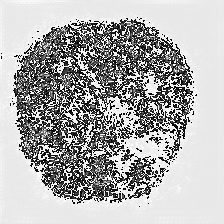

In [189]:
explainer = IntegratedGradients()
explanations = explainer.explain(
    validation_data=(img_array, target_label),  # Pasar la imagen y la clase objetivo
    model=loaded_model,
    class_index=target_label  # Especificar la clase objetivo
)
explanations

Observamos en este primer Sample una region blanca en la parte inferior derecha donde al parecer hay una cantidad menor de pixeles negros, dando a entender que hay una ligera parte de tegido muerto en el cerebro, llegando el modelo a la conclusion de que tiene Demencia Moderada (Moderate Demented)

### Predicción 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


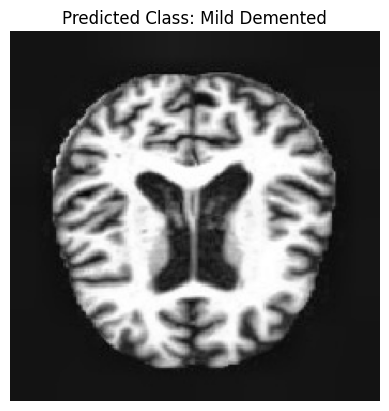

In [232]:
image_path = 'processed_dataset_clahe/MildDemented/7eef101f-f654-4274-86f3-a506a505a34f.jpg'   # Replace with your image path

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize as done during training

# Predict the class
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]

# Get the class name using the index
predicted_class_name = class_names[predicted_class]

target_label = predicted_class

# Display the image and predicted class name
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Class: {predicted_class_name}")
plt.show()


array([[153, 160, 162, ..., 178, 181, 155],
       [152, 153, 152, ..., 182, 181, 153],
       [164, 172, 158, ..., 162, 153, 147],
       ...,
       [146, 147, 147, ..., 149, 148, 146],
       [147, 152, 151, ..., 148, 147, 146],
       [147, 152, 151, ..., 150, 151, 148]], dtype=uint8)
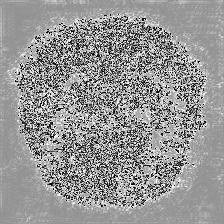

In [233]:
explainer = IntegratedGradients()
explanations = explainer.explain(
    validation_data=(img_array, target_label),  # Pasar la imagen y la clase objetivo
    model=loaded_model,
    class_index=target_label  # Especificar la clase objetivo
)
explanations

Se puede observar en la region derecha y en el centro izquierdo unas zonas ligeramente blancas, pero con muy poca intensidad, esto fue indispensable para el modelo entender que de por si estas zonas de los pixeles que fueron usados para realizar la prediccion dan un resultado de una Leve Demencia (Mild Demented)

### Predicción 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


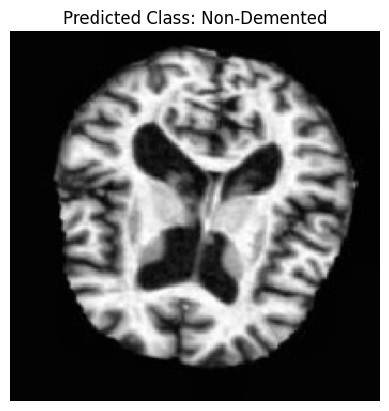

In [199]:
image_path = '68b79c17-37d4-4355-b492-95d427926624.jpg'   # Replace with your image path

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize as done during training

# Predict the class
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]

# Get the class name using the index
predicted_class_name = class_names[predicted_class]

target_label = predicted_class

# Display the image and predicted class name
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Class: {predicted_class_name}")
plt.show()


array([[126, 133, 131, ..., 126, 132, 123],
       [128, 130, 126, ..., 135, 141, 126],
       [124, 138, 147, ..., 135, 136, 125],
       ...,
       [129, 128, 124, ..., 138, 131, 126],
       [133, 131, 125, ..., 134, 130, 136],
       [123, 125, 124, ..., 127, 144, 149]], dtype=uint8)
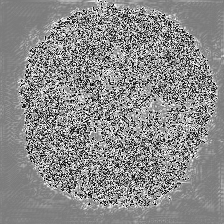

In [200]:
explainer = IntegratedGradients()
explanations = explainer.explain(
    validation_data=(img_array, target_label),  # Pasar la imagen y la clase objetivo
    model=loaded_model,
    class_index=target_label  # Especificar la clase objetivo
)
explanations

El gradiente parece tener plomos de forma mas regular a lo largo del plano, al no haber zonas blancas e interpretadas como tejido muerto, con esto el modelo puede acertar y entender de que no hay demencia (Non-Demented)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


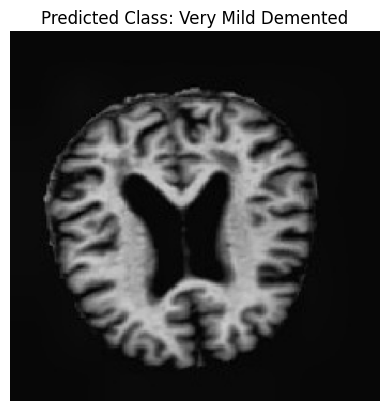

In [225]:
image_path = 'processed_dataset_clahe/VeryMildDemented/71902420-7ec6-44e3-b9de-0b899ef068ea.jpg'   # Replace with your image path

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize as done during training

# Predict the class
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]

# Get the class name using the index
predicted_class_name = class_names[predicted_class]

target_label = predicted_class

# Display the image and predicted class name
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Class: {predicted_class_name}")
plt.show()


array([[254, 254, 254, ..., 254, 255, 254],
       [254, 254, 254, ..., 255, 255, 254],
       [254, 254, 254, ..., 255, 255, 254],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 255, 254, 255],
       [254, 254, 254, ..., 254, 255, 255]], dtype=uint8)
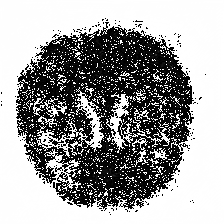

In [224]:
explainer = IntegratedGradients()
explanations = explainer.explain(
    validation_data=(img_array, target_label),  # Pasar la imagen y la clase objetivo
    model=loaded_model,
    class_index=target_label  # Especificar la clase objetivo
)
explanations

Tenemos una zona blanca que resalta bastante en la parte inferior izquierda, el modelo podria interpretar que esta zona de los pixeles fue aquella que se utilizo para predecir la posible existencia de una Muy Leve Demencia (Very Mild Demented)

En la visualización de los gradientes, los píxeles negros son aquellos que tuvieron una mayor influencia en la predicción del modelo. Estos píxeles representan las áreas más relevantes de la imagen que ayudaron al modelo a decidir la clase correcta. Cuantos más píxeles negros y mas o menos espacios blancos haya en el gradiente mayor es la contribución de esas áreas en la decisión final

En el contexto médico, particularmente en imágenes cerebrales para la detección del Alzheimer, los píxeles negros pueden interpretarse como áreas de tejido cerebral saludable. Por otro lado, las áreas del cerebro que no se destacan con píxeles negros indican tejido dañado o muerto. Esto se debe a que el modelo está entrenado para reconocer patrones de daño cerebral, y los gradientes permiten visualizar qué partes del cerebro son relevantes para la predicción de un diagnóstico.

De este modo, los gradientes no solo nos dicen qué clase predijo el modelo, sino también nos dan una indicación del grado de daño cerebral presente, ayudando a los profesionales de la salud a comprender mejor el impacto del Alzheimer en el paciente.